In [32]:
import pandas as pd
star=pd.read_excel("Output2.xlsx")
print(star.columns)
star.drop(columns=['Unnamed: 0'], inplace=True)


Index(['Unnamed: 0', 'Index', 'Reviews ', 'Sentiment'], dtype='object')


In [33]:
star.head()

,Index,Reviews,Sentiment
0,1,Called for a cold match latte. It was so swee...,Negative
1,2,Coffee arrived open and spilled,Neutral
2,3,Not the usual Java Chip. Something was wrong!,Negative
3,4,The coffee was extremely sweet and watery. Cou...,Positive
4,5,coffee half filled and no milk in it,Positive


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
print(star['Sentiment'].isna().sum())  # Check for NaN values in the Sentiment column


0


[nltk_data] Downloading package stopwords to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['Index', 'Reviews', 'Sentiment'], dtype='object')
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[13  5]
 [ 6  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.64      0.60      0.62        15

    accuracy                           0.67        33
   macro avg       0.66      0.66      0.66        33
weighted avg       0.67      0.67      0.67        33



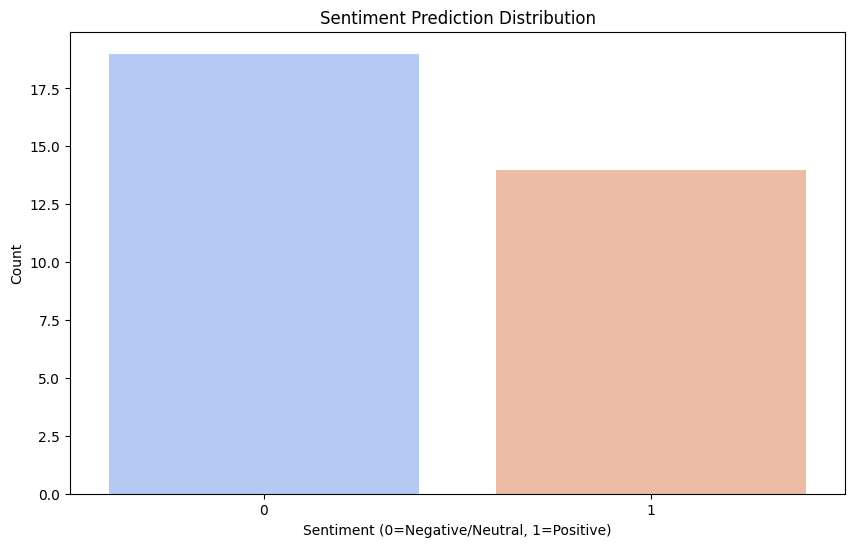

In [37]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# Download the stopwords

# Step 1: Load the dataset (assuming 'full_review_text' is your review column)
# df = pd.read_csv('your_dataset.csv')
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization

# Step 2: Preprocess the data
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset

# Strip column names of any leading/trailing whitespace
star.columns = star.columns.str.strip()

# Check the column names to ensure 'Reviews' exists
print(star.columns)

# Ensure there are no NaN values in the Reviews column
star['Reviews'] = star['Reviews'].fillna("")  # Replace NaN with an empty string


# Step 3: Convert sentiments to binary values (positive/negative) for simplicity
star['Sentiment'] =star['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})  # You can adjust neutral as needed

# Step 4: Vectorize the reviews (convert text into numerical features)
vectorizer = CountVectorizer(max_features=3000)
X = vectorizer.fit_transform(star['Reviews'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, star['Sentiment'], test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 8: Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

# Step 9: Visualize the sentiment predictions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Sentiment Prediction Distribution')
plt.xlabel('Sentiment (0=Negative/Neutral, 1=Positive)')
plt.ylabel('Count')
plt.show()

In [45]:
import pandas as pd
df=pd.read_excel("Output.xlsx")
print(df.columns)
df.drop(columns=['Unnamed: 0'], inplace=True)


Index(['Unnamed: 0', 'coffee_shop_name', 'full_review_text', 'star_rating',
       'Sentiment'],
      dtype='object')


In [46]:
df.head()

,coffee_shop_name,full_review_text,star_rating,Sentiment
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,Positive
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,Positive
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,Positive
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,Positive
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,Positive


[nltk_data] Downloading package stopwords to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['coffee_shop_name', 'full_review_text', 'star_rating', 'Sentiment'], dtype='object')
Accuracy: 0.9343832020997376
Confusion Matrix:
 [[  28   46]
 [  54 1396]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36        74
           1       0.97      0.96      0.97      1450

    accuracy                           0.93      1524
   macro avg       0.65      0.67      0.66      1524
weighted avg       0.94      0.93      0.94      1524



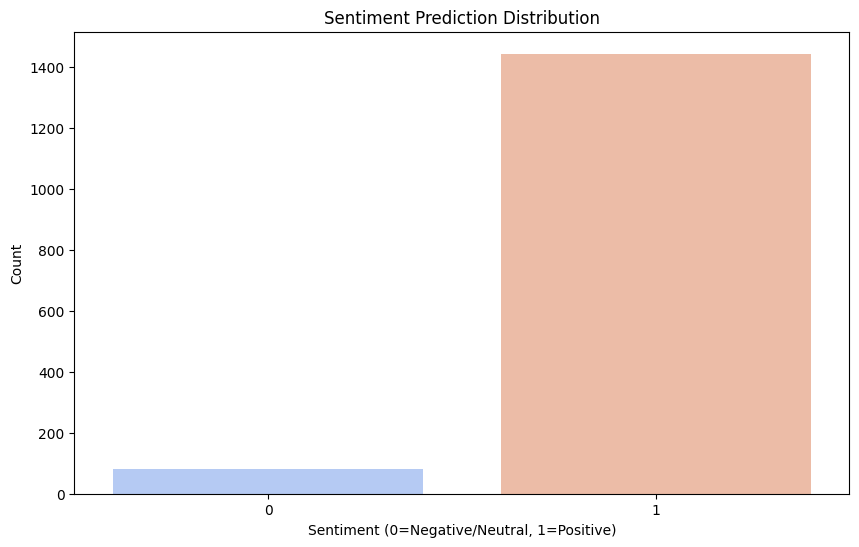

In [47]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# Download the stopwords

# Step 1: Load the dataset (assuming 'full_review_text' is your review column)
# df = pd.read_csv('your_dataset.csv')
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization

# Step 2: Preprocess the data
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset

# Strip column names of any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Check the column names to ensure 'Reviews' exists
print(df.columns)

# Ensure there are no NaN values in the Reviews column
df['full_review_text'] = df['full_review_text'].fillna("")  # Replace NaN with an empty string


# Step 3: Convert sentiments to binary values (positive/negative) for simplicity
df['Sentiment'] =df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})  # You can adjust neutral as needed

# Step 4: Vectorize the reviews (convert text into numerical features)
vectorizer = CountVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['full_review_text'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 8: Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

# Step 9: Visualize the sentiment predictions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Sentiment Prediction Distribution')
plt.xlabel('Sentiment (0=Negative/Neutral, 1=Positive)')
plt.ylabel('Count')
plt.show()

In [56]:
import pandas as pd
a=pd.read_excel("Output3.xlsx")
print(a.columns)
a.drop(columns=['Unnamed: 0'], inplace=True)


Index(['Unnamed: 0', 'Index', 'Name', 'Overall_Rating', 'Cuisine',
       'Rate for two', 'City', 'Review', 'Sentiment'],
      dtype='object')


In [57]:
a.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review,Sentiment
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...,Positive
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...,Positive
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake,Negative
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...,Positive
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love this Be...",Positive


Index(['Index', 'Name', 'Overall_Rating', 'Cuisine', 'Rate for two', 'City',
       'Review', 'Sentiment'],
      dtype='object')
Accuracy: 0.864516129032258
Confusion Matrix:
 [[55 11]
 [10 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        66
           1       0.88      0.89      0.88        89

    accuracy                           0.86       155
   macro avg       0.86      0.86      0.86       155
weighted avg       0.86      0.86      0.86       155



[nltk_data] Downloading package stopwords to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SNEHA
[nltk_data]     GAWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


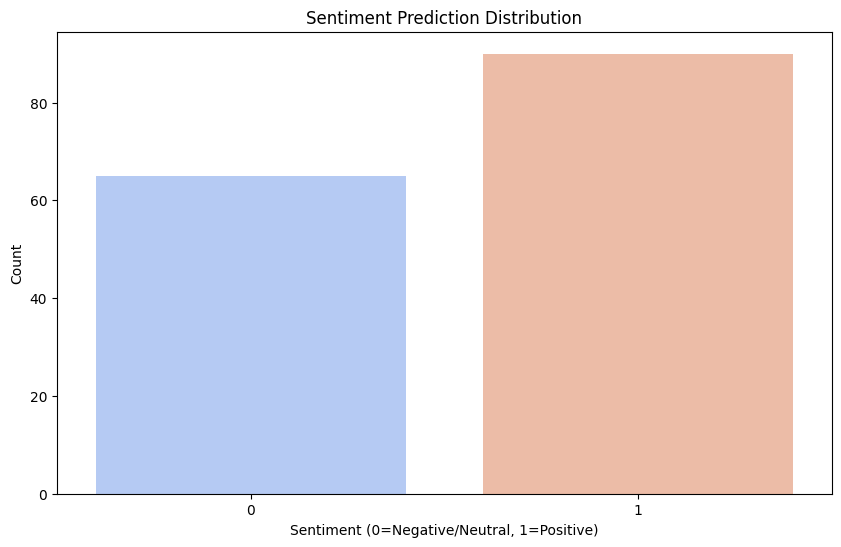

In [59]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# Download the stopwords

# Step 1: Load the dataset (assuming 'full_review_text' is your review column)
# df = pd.read_csv('your_dataset.csv')
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization

# Step 2: Preprocess the data
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset

# Strip column names of any leading/trailing whitespace
a.columns = a.columns.str.strip()

# Check the column names to ensure 'Reviews' exists
print(a.columns)

# Ensure there are no NaN values in the Reviews column
a['Review'] = a['Review'].fillna("")  # Replace NaN with an empty string


# Step 3: Convert sentiments to binary values (positive/negative) for simplicity
a['Sentiment'] =a['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})  # You can adjust neutral as needed

# Step 4: Vectorize the reviews (convert text into numerical features)
vectorizer = CountVectorizer(max_features=3000)
X = vectorizer.fit_transform(a['Review'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, a['Sentiment'], test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 8: Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

# Step 9: Visualize the sentiment predictions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Sentiment Prediction Distribution')
plt.xlabel('Sentiment (0=Negative/Neutral, 1=Positive)')
plt.ylabel('Count')
plt.show()